In [1]:
import numpy as np # linear algebra

# Data



<table style="width:20%">
<tr>
<th>No.</th>
<th>Input</th>
<th>Output</th>
</tr>

<tr>
<td>1</td>
<td>0&nbsp;0&nbsp;1</td>
<td>0</td>
</tr>

<tr>
<td>2</td>
<td>1&nbsp;1&nbsp;1</td>
<td>1</td>
</tr>

<tr>
<td>3</td>
<td>1&nbsp;0&nbsp;1</td>
<td>1</td>
</tr>

<tr>
<td>4</td>
<td>0&nbsp;1&nbsp;1</td>
<td>0</td>
</tr>
</table>

This is a perfect classification example for beginners.<br>
Can we visually try to map the input to its corresponding output ?<br>
If we did so, we would see that the leftmost input column is perfectly correlated with the output<br>
This is our goal. Let's make Neural Network do this.

# What are Artificial Neural Networks(ANN) ?
At its core, an ANN can be described by the following image.

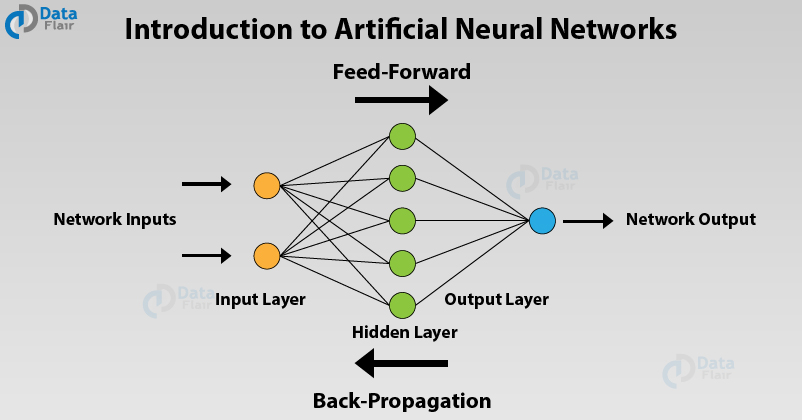



# Fundamentals
- As the name suggests ANN is a network of interconnected perceptrons(represented by colourful circles)
- Perceptrons are nodes where decisions are made (they draw parallels with neurons in the brain)
- These decisions are made by feeding the input to the node to a function
- A function can be linear(like Rectified Linear Unit - ReLU) or non-linear(like sigmoid)
- On a lighter note, these function's name and their understandability are inversely proportional
- The connection between two nodes draw parallels with synapses in the brain (they carry information between nodes)
- In ANN, these synapses carry weights (information of degree of importance) of the input that is going to be feed to a node
- A basic ANN has layers of nodes stacked in parallel (The number of layers depend on the complexity of the problem)
- The input layer makes no decision, it just provides the input to the network
- An ANN can have zero or n number of hidden layers, as said before - depending on the complexity of the problem
- The final decison is made by output layer, which gives out the network's decision
- An ANN has two primary responsibilities, first making a decision (by a process called Feed-Forward) and learn from those decisions (by a process called Back-Propagation) to make better decisions


# Let's get our hands dirty!
Lets create the most basic ANN to solve our problem mentioned before.

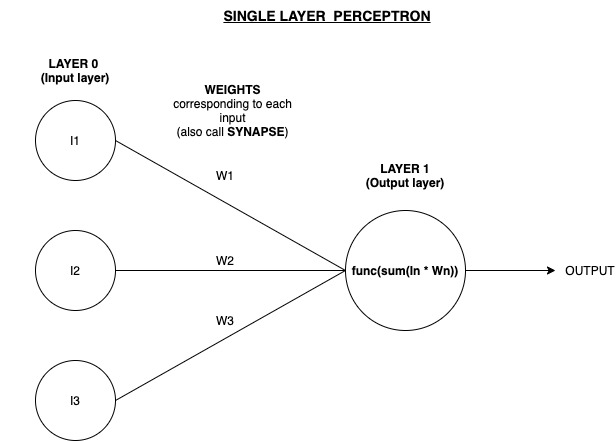

- One important thing here to node down here is we have no hidden layer.
- We have not used the hidden layer at the very go because we not sure of the complexity of our problem
- The another important thing to note is, the input that is feed to the node at the output layer, is multiplied by its weight and products are summed
- As mentioned before, a weight related to an input signifies the degree of importance of the same input
- We will see later in this post, how to decide the function at the output node, which will determine the actual output

# Kickoff...

In [2]:
input = [[0,0,1],[0,1,1],[1,0,1],[1,1,1]]
output = [0, 0, 1, 1]

In [3]:
X = np.array(input)
print(X.shape)
X

(4, 3)


array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

Here, 4 represents the number of samples of inputs, and 3 represents the number of elements in each input

In [4]:
Y = np.array(output).reshape(4,1)
print(Y.shape)
Y

(4, 1)


array([[0],
       [0],
       [1],
       [1]])

Here, 4 represents the number of outputs, and 1 represents the number of elements in each output

In [5]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(42)

In [6]:
# We are initialize weights(synapses) randomly,
#such that there is a mix of both positive and negative numbers between -1 and 1 (again a good practice)
synapse = 2*np.random.random((3,1)) - 1
print(synapse.shape)
synapse

(3, 1)


array([[-0.25091976],
       [ 0.90142861],
       [ 0.46398788]])

Suppose the inputs are,<br>
<table style="width:20%">
<tr>
<th>I1</th>
<th>I2</th>
<th>I3</th>
</tr>

<tr>
<td>I11</td>
<td>I12</td>
<td>I13</td>
</tr>

<tr>
<td>I21</td>
<td>I22</td>
<td>I23</td>
</tr>

<tr>
<td>I31</td>
<td>I32</td>
<td>I33</td>
</tr>

<tr>
<td>I41</td>
<td>I42</td>
<td>I43</td>
</tr>
</table><br>

and the weights are,<br>
<table style="width:20%">
<tr>
<th>W</th>
</tr>

<tr>
<td>W1</td>
</tr>

<tr>
<td>W2</td>
</tr>

<tr>
<td>W3</td>
</tr>
</table><br>
Then, W1 represents weights for I1, W2 for I2 and W3 for I3.<br>
This representation of data empowers us to use dot product from Linear algebra,<br>
Because for a given input (I1, I2, I3), it is not only getting multiplied by its corresponding weight but also these products are summed.

<table style="width:20%">
<tr>
<th>Input for Output node</th>
</tr>

<tr>
<td>I11 x W1 + I12 x W2 + I13 x W3</td>
</tr>

<tr>
<td>I21 x W1 + I22 x W2 + I23 x W3</td>
</tr>

<tr>
<td>I31 x W1 + I32 x W2 + I33 x W3</td>
</tr>

<tr>
<td>I41 x W1 + I42 x W2 + I43 x W3</td>
</tr>
</table><br>


In [7]:
input_for_output_node = np.dot(X, synapse)

# Heading towards the goal post...<br>
- Now we are looking for a function (which has to be non linear)that will take out input and return us the desired output in terms of 0 and 1.<br>
- Here comes our saviour, [The Sigmoid function.](https://en.wikipedia.org/wiki/Sigmoid_function)<br>
- As per wiki,<br>
A sigmoid function is a<br>
&nbsp;- bounded (between 0 and 1),<br>
&nbsp;- differentiable,<br> 
&nbsp;- real function<br>
that is defined for all real input values and has a <b>non-negative derivative</b> at each point.<br>
- Another beautify of Sigmoid function is its derivative,<br>
&nbsp;- at any given point "x" on the sigmoid curve, its dervivative is given by x * (1 - x)<br>
&nbsp;- In a very short time we will see why this is help full
- This what we wanted, lets feed our "input_for_output_node" in the sigmoid function.


In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def sigmoid_derivative(output):
    return output * (1 - output)

In [10]:
output = sigmoid(input_for_output_node)
output

array([[0.61395979],
       [0.79663861],
       [0.55306642],
       [0.75296649]])

# and missed !
- This is not what we expected.<br>
- We expected output in either 0s or 1s.<br>
- But what we got is decimal numbers that too some are close to 0.5<br>
- This makes the interpretation of the output even more confusing

# Light at end of the tunnel...
- Remember, we had mentioned earlier that an ANN has two fundamental responsibilities<br>
- First, Feed-Forward (making a decision), this what we have done till now<br>
- We have used ANN to just make its first decision<br>
- Feed-Forward - Passing the input data from input layer to output layer through various interactions through nodes<br>
- What about the second fundamental duty ? Learning ?<br>
- Back-Propagation - It's a process to identify various elements in the network which are reponsible for the error (in this case, its the weights) and its contribution to this error<br>
- We don't only need to identify weights causing this error but also improve them<br>
- This process of improving the weights causing error is called Optimization and we will use one(Gradient descent) in this post



# Let's bounce back

In [11]:
error = output - Y 
error

array([[ 0.61395979],
       [ 0.79663861],
       [-0.44693358],
       [-0.24703351]])

# Catch !

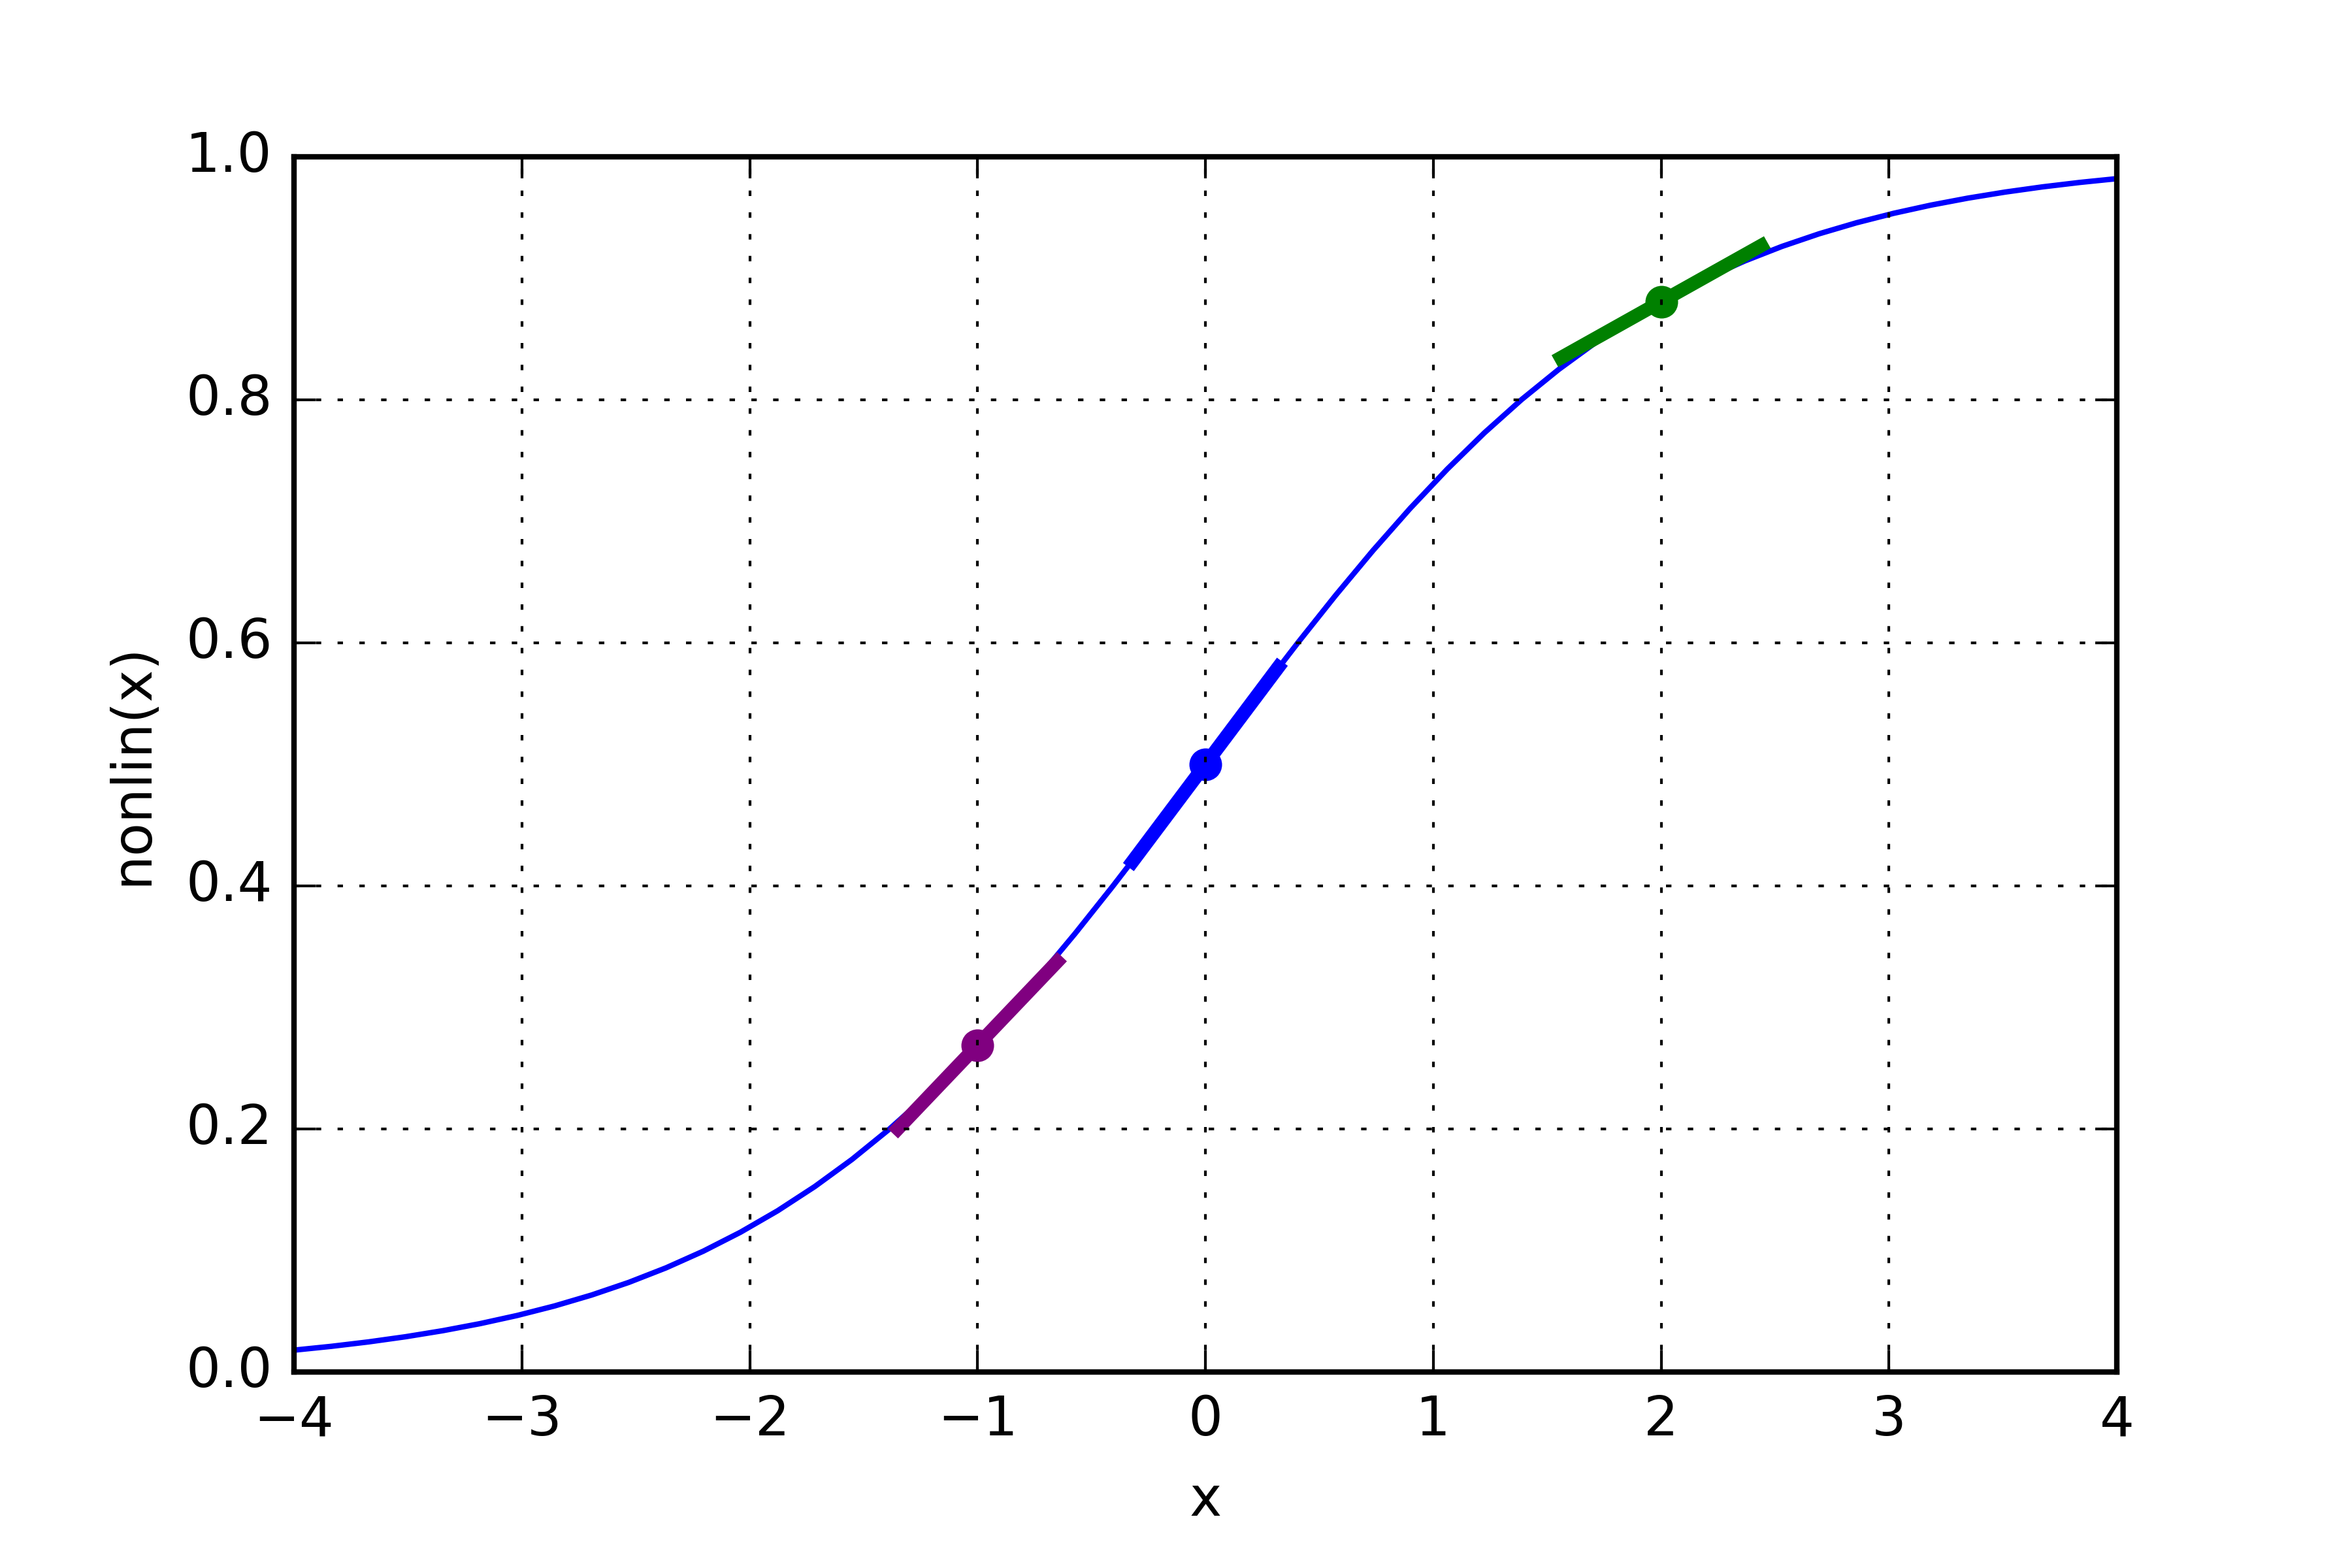

- If the output represents the above three dots, the derivate of at these points generates the slopes of the lines
- Notice that very high values such as x=2.0 (green dot) and very low values such as x=-1.0 (purple dot) have rather shallow slopes. 
- The highest slope you can have is at x=0 (blue dot). This plays an important role. Also notice that all derivatives are between 0 and 1

# Hold your breath !

In [12]:
error_weighted_derivative = sigmoid_derivative(output) * error

- When we multiply the "slopes" by the error, we are reducing the error of high confidence predictions
- If the slope was really shallow (close to 0), then the network either had a very high value, or a very low value
- This means that the network was quite confident one way or the other
- However, if the network guessed something close to (x=0, y=0.5) then it isn't very confident
- We update these "wishy-washy" predictions most heavily, and we tend to leave the confident ones alone by multiplying them by a number close to 0


# Oversimplified Gradient Descent...
Let's have a look at following sample neural network error curves,

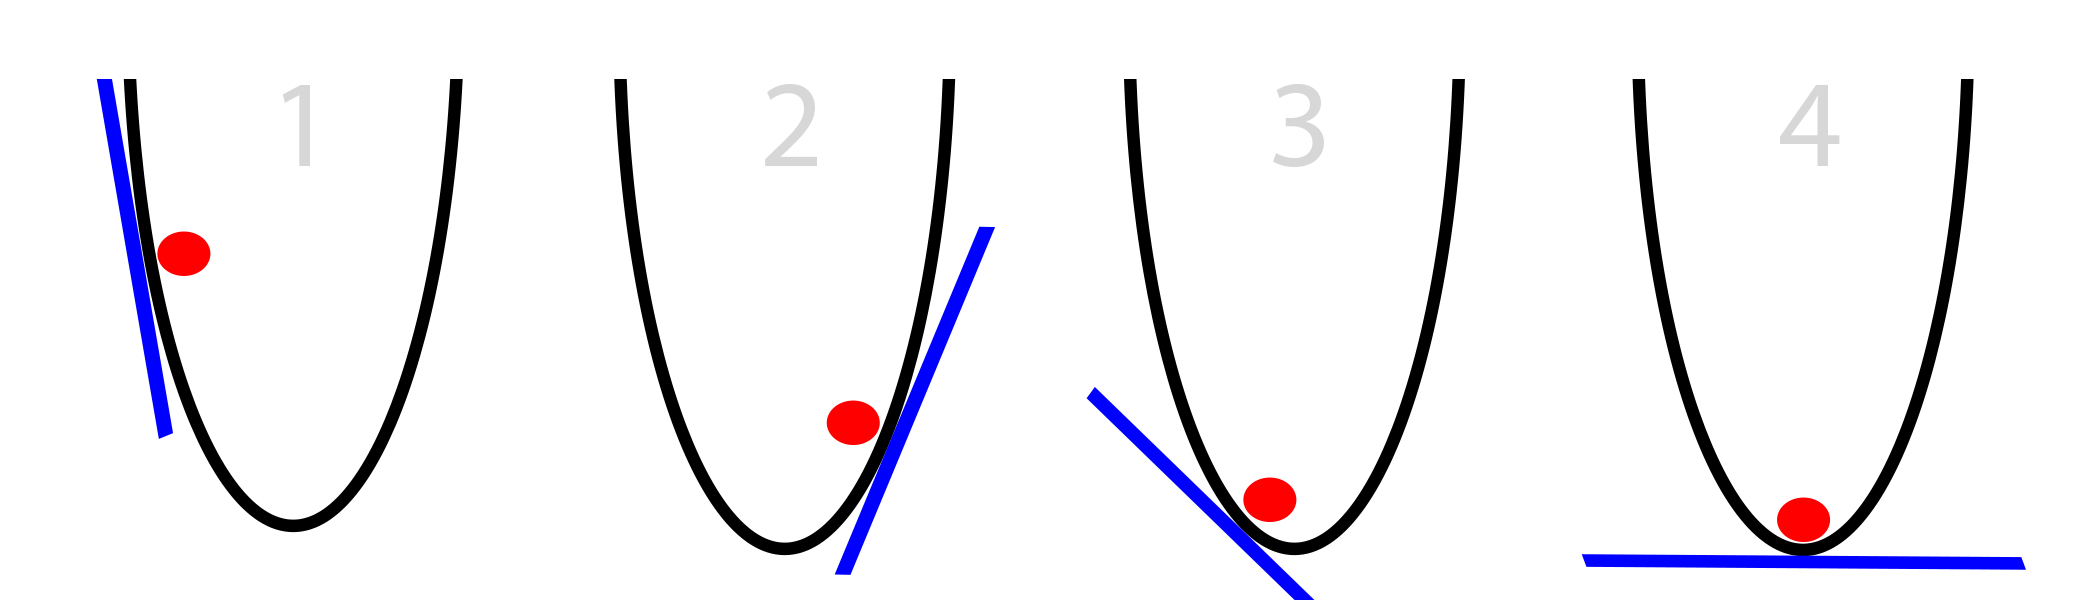

- Calculate slope at current position
- If slope is negative, move right
- If slope is positive, move left
- Repeat until slope == 0, when there is no error<br>
<br>
Gosh...Can Gradient Descent be simpler than this ?


In [13]:
synapse_derivative = np.dot(X.T,error_weighted_derivative)
synapse_derivative

array([[-0.15642501],
       [ 0.08310967],
       [ 0.11815141]])

In [14]:
synapse -= synapse_derivative

# This completes Back Propagation...first steps towards learning !
 - Now we have to Feed-Forward the the data inputs again with with updated synapse.
 - This process needs to be iterated until our error becomes close to zero


In [15]:
for iter in range(5000):

    # forward propagation
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0,synapse))

    # how much did we miss?
    layer_1_error = layer_1 - Y
    
    if(iter % 1000 == 0):
        print("Error - {}".format(layer_1_error))

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in layer_1
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)
    synapse_0_derivative = np.dot(layer_0.T,layer_1_delta)

    # update weights
    synapse -= synapse_0_derivative
    
print("Output After Training:")
layer_1

Error - [[ 0.58560757]
 [ 0.76208696]
 [-0.43749328]
 [-0.25546762]]
Error - [[ 0.03187032]
 [ 0.02576904]
 [-0.0209258 ]
 [-0.02591085]]
Error - [[ 0.02213675]
 [ 0.01794081]
 [-0.01459195]
 [-0.01801904]]
Error - [[ 0.01793195]
 [ 0.01455045]
 [-0.01184284]
 [-0.01460442]]
Error - [[ 0.01545647]
 [ 0.01255128]
 [-0.01022002]
 [-0.01259248]]
Output After Training:


array([[0.01378176],
       [0.01119732],
       [0.99087981],
       [0.98876935]])

# End notes<br>
 - This is the basic NN architecture
 - What if our errors start to increase again ? Can this happen ? 
 - Can our implementation skip the zero level error and pass through other end of error curve ?
 - Can we tune the number of iterations ?
 - These are some of the important questions I will be answering in my future post.<br>
 
 Till that time can you solve the below problem ?<br>

<table style="width:20%">
<tr>
<th>No.</th>
<th>Input</th>
<th>Output</th>
</tr>

<tr>
<td>1</td>
<td>0&nbsp;0&nbsp;1</td>
<td>0</td>
</tr>

<tr>
<td>2</td>
<td>1&nbsp;1&nbsp;0</td>
<td>0</td>
</tr>

<tr>
<td>3</td>
<td>1&nbsp;0&nbsp;1</td>
<td>1</td>
</tr>

<tr>
<td>4</td>
<td>0&nbsp;1&nbsp;1</td>
<td>1</td>
</tr>
</table>
 